In [ ]:
import re
import math
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# calculate mean, standard deviation, upper and lower bounds in confidence intervals for population size, the proportion of cooperators, average degree of cooperation, and range size

def OrgResVar(file_path, output_path=None):
    input = pd.read_csv(file_path).replace(-1, np.nan)

    colnames = ["coop_efficiency", "cost_rate", "sociality", 
                "res_mean", "res_var_range", "res_sd",
                "pop_size_mean", "pop_size_sd", "pop_size_ub", "pop_size_lb", 
                "coop_prop_mean", "coop_prop_sd", "coop_prop_ub", "coop_prop_lb", 
                "coop_deg_mean", "coop_deg_sd", "coop_deg_ub", "coop_deg_lb", 
                "range_size_mean", "range_size_sd", "range_size_ub", "range_size_lb"]

    df = pd.DataFrame(np.zeros([input.res_var_range.unique().size, len(colnames)]), columns = colnames)

    num_replic = input.replic.unique().size

    r = 0

    for i in range(input.res_var_range.unique().size):
        df.loc[i, ["coop_efficiency", "cost_rate", "sociality"]] = input.loc[r, ["coop_efficiency", "cost_rate", "sociality"]].values

        df.loc[i, "res_mean"] = input.loc[r, "res_mean"]
        df.loc[i, "res_var_range"] = input.loc[r, "res_var_range"]

        target = input[input.res_var_range == df.loc[i, "res_var_range"]]
        df.loc[i, "res_sd"] = target.res_0.std()
        
        df.loc[i, ["pop_size_mean", "coop_prop_mean", "coop_deg_mean"]] = target.loc[:, ["pop_size", "coop_prop", "aver_coop_deg"]].mean().values
        df.loc[i, ["pop_size_sd", "coop_prop_sd", "coop_deg_sd"]] = target.loc[:, ["pop_size", "coop_prop", "aver_coop_deg"]].std().values

        errs = (1.959964*df.loc[i, ["pop_size_sd", "coop_prop_sd", "coop_deg_sd"]]/math.sqrt(num_replic)).values
        df.loc[i, ["pop_size_ub", "coop_prop_ub", "coop_deg_ub"]] = df.loc[i, ["pop_size_mean", "coop_prop_mean", "coop_deg_mean"]].add(errs).values
        df.loc[i, ["pop_size_lb", "coop_prop_lb", "coop_deg_lb"]] = df.loc[i, ["pop_size_mean", "coop_prop_mean", "coop_deg_mean"]].subtract(errs).values

        group_sizes = target.loc[:, [f"pop_size_{j}" for j in range(int(re.search("res_(\d+)", input.columns[-1]).group(1)) + 1)]]
        range_size = []
        for k in range(group_sizes.shape[0]):
            range_size.append(len(group_sizes.iloc[k][group_sizes.iloc[k]>0]))
        range_size = np.array(range_size)
        df.loc[i, "range_size_mean"] = range_size.mean()
        df.loc[i, "range_size_sd"] = range_size.std()
        err = 1.959964*df.loc[i, "range_size_sd"]/math.sqrt(num_replic)
        df.loc[i,"range_size_ub"] = df.loc[i, "range_size_mean"] + err
        df.loc[i,"range_size_lb"] = df.loc[i, "range_size_mean"] - err

        r = r + num_replic

    if output_path:
        df.to_csv(output_path, index=False)
    
    return df
    

In [78]:
for sociality in ["ns", "ca", "rd"]:
    simulation_output_list_fname = f"./data/output_file_list_se_pfs_{sociality}.txt"

    with open(simulation_output_list_fname, "r") as f:
        input_list = json.load(f)

    for i, file_path in enumerate(input_list):
        df = OrgResVar(file_path)
        if i == 0:
            df_concat = df
        else:
            df_concat = pd.concat([df_concat, df], axis = 0, ignore_index=True)

    df_concat.to_csv(f"./data/social_evolution/{sociality}o_pfs_xxxxm0p0.csv", index=False)

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.orgdata import orgpfs, myconcat
import utils.cmapgen.cmapgen as cg
import utils.plotdata.plothm as pm
import utils.plotdata.plotproperties as pp

In [12]:
def PlotGrids(fname, coop):
    df = pd.read_table(fname, header=None, sep='\t').replace(-1, np.nan)
    
    if coop:
        hexlist = ["#FFFFFF", "#ff6a4d"]
    else:
        hexlist = ["#FFFFFF", "#888888"]
    
    x = []
    for i in range(23):
        x = x + [i]*23

    p = 0

    dd = {"x":     list(range(23))*23,
          "y":     x,
          "gsize": list(df.iloc[p, range(10, 539)]),
          "prop":  list(np.array(df.iloc[p, range(539, 1068)])/np.array(df.iloc[p, range(10, 539)])),
          "deg":   list(np.array(df.iloc[p, range(1068, 1597)])/np.array(df.iloc[p, range(10, 539)])),
          "res":   list(df.iloc[p, range(1597, 2126)])}
    dfh = pd.DataFrame(dd)

    dfprop = dfh.pivot("y", "x", "gsize")
    ax = sns.heatmap(dfprop, vmin = 0, vmax = 9, square = True, cmap = cg.get_continuous_cmap(hexlist), cbar_kws={'label': 'Number of individuals'})
    plt.savefig(fname[:-4]+".pdf")

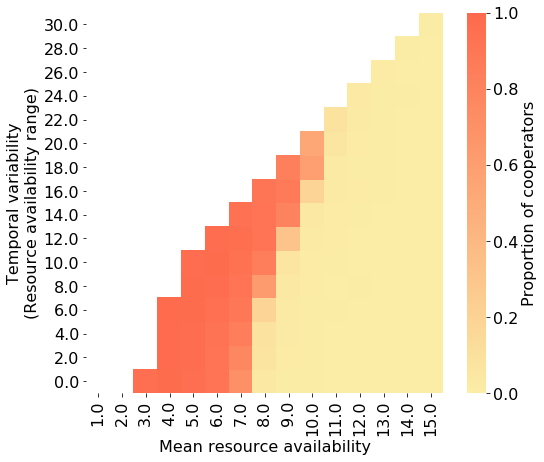

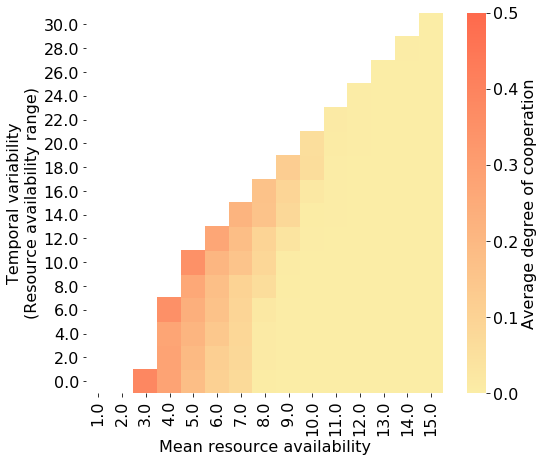

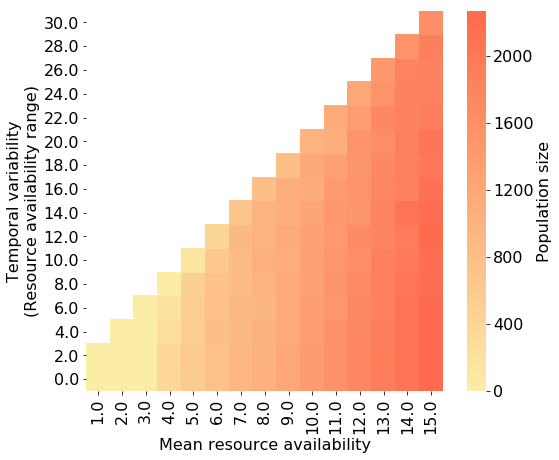

In [2]:
pm.plot_heatmaps3("cao_pfs_xxxx.csv", "Temporal", cg.get_continuous_cmap(["#fceea7", "#ff6a4d"]))

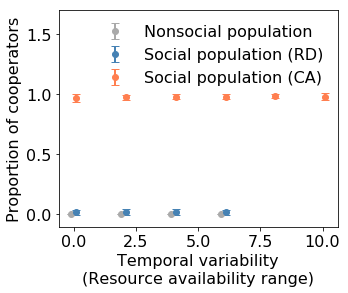

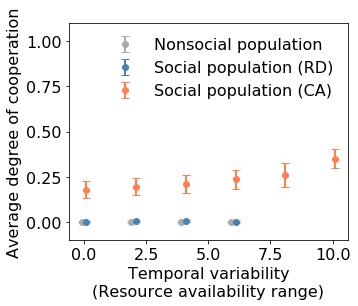

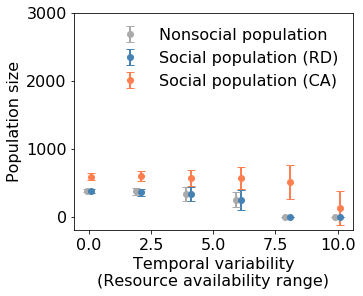

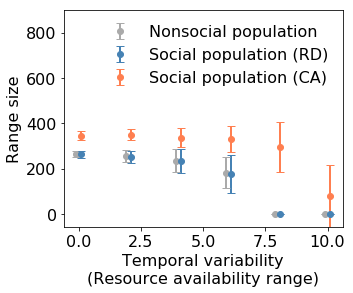

In [5]:
pp.plot_properties5("cao_pfs_05xx1.csv", "rdo_pfs_05xx1.csv", "cao_pfs_05xx0.csv", "Temporal")

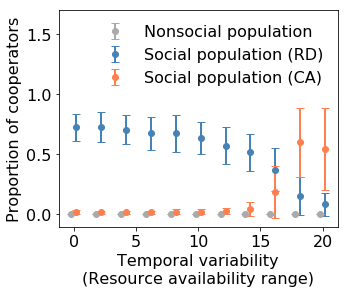

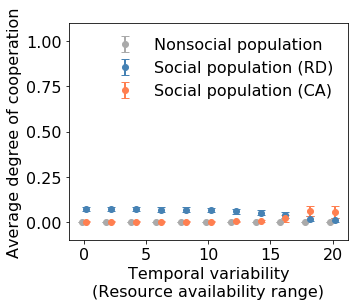

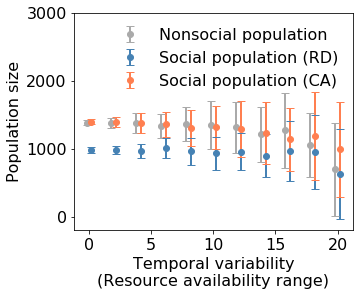

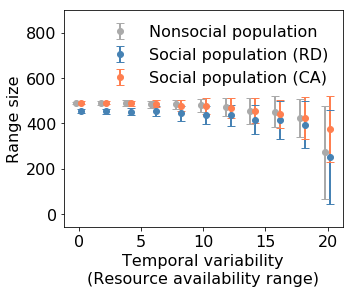

In [20]:
pp.plot_properties5("cao_pfs_10xx1.csv", "rdo_pfs_10xx1.csv", "cao_pfs_10xx0.csv", "Temporal")

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


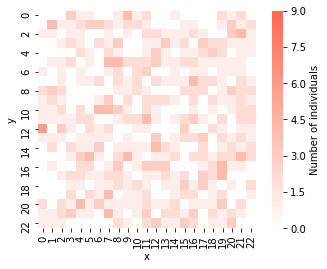

In [13]:
PlotGrids("cao_pfs_05xx.txt", True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


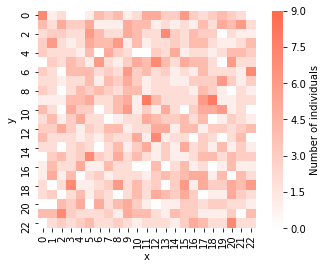

In [18]:
PlotGrids("cao_pfs_10xx.txt", True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


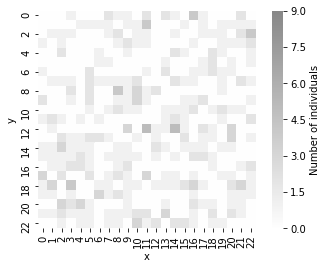

In [15]:
PlotGrids("cao_pfs_05xx0.txt", False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars


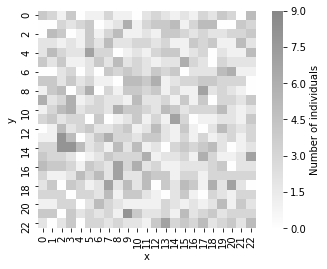

In [17]:
PlotGrids("cao_pfs_10xx0.txt", False)